In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import zipfile

zip_path = "/content/archive (3).zip"
extract_dir = "/content/extracted_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("ZIP file extracted.")


ZIP file extracted.


In [7]:
dataset_path = "/content/extracted_dataset"


In [8]:

import os
import cv2
import glob
import numpy as np

# Set dataset path
dataset_path = "/content/extracted_dataset"

# Find all image files
image_files = glob.glob(os.path.join(dataset_path, "**", "*.png"), recursive=True)

print(f" Found {len(image_files)} images.")

# Check if images exist
if len(image_files) == 0:
    print(" No images found. Check dataset structure.")
else:
    print(f" Example image path: {image_files[0]}")

# Load and process images
image_data = []
for image_path in image_files[:500]:  # Limit to 500 images to save memory
    img = cv2.imread(image_path)
    if img is None:
        print(f" Failed to load: {image_path}")
        continue

    # Resize to 224x224 (to keep model input consistent)
    img = cv2.resize(img, (224, 224))

    # Convert to grayscale (optional)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values
    img_gray = img_gray / 255.0

    # Flatten image into feature vector
    image_data.append(img_gray.flatten())

print(f" Processed {len(image_data)} images.")


 Found 500 images.
 Example image path: /content/extracted_dataset/TrainDataCamera5/RGB501b68e4-8764-4677-bab9-7324aa391d42/rgb_866.png
 Processed 500 images.


In [9]:
import os

extract_path = "/content/extracted_dataset"
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['TrainDataCamera5', 'TrainDataCamera4']


In [27]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Load MobileNetV2 model
model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")

# Convert frames to AI-compatible format
frame_features = []

for frame in frame_data:
    frame_resized = cv2.resize(frame, (224, 224))  # Resize for MobileNetV2
    frame_array = preprocess_input(frame_resized.astype("float32"))
    frame_array = np.expand_dims(frame_array, axis=0)  # Add batch dimension

    # Extract features
    features = model.predict(frame_array)
    frame_features.append(features)

print("Extracted AI features from frames")


<ipython-input-27-9cac2e733af8>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")


Extracted AI features from frames


In [28]:
import os
import cv2
import glob
import numpy as np

# Set dataset path
dataset_path = "/content/extracted_dataset"

# Find all image files
image_files = glob.glob(os.path.join(dataset_path, "**", "*.png"), recursive=True)

print(f" Found {len(image_files)} images.")

# Check if images exist
if len(image_files) == 0:
    print(" No images found. Check dataset structure.")
else:
    print(f" Example image path: {image_files[0]}")

# Load and process images
image_data = []
for image_path in image_files[:1000]:  # Limit to 1000 images to save memory
    img = cv2.imread(image_path)
    if img is None:
        print(f" Failed to load: {image_path}")
        continue

    # Resize to 224x224 pixels
    img = cv2.resize(img, (224, 224))

    # Convert to grayscale (optional)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values
    img_gray = img_gray / 255.0

    # Flatten image into feature vector
    image_data.append(img_gray.flatten())

print(f" Processed {len(image_data)} images.")


 Found 500 images.
 Example image path: /content/extracted_dataset/TrainDataCamera5/RGB501b68e4-8764-4677-bab9-7324aa391d42/rgb_866.png
 Processed 500 images.


In [29]:
from sklearn.ensemble import IsolationForest

# Convert list to NumPy array
features_array = np.vstack(image_data)

# Train Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(features_array)

print("Isolation Forest model trained successfully.")


Isolation Forest model trained successfully.


In [30]:
# Predict anomalies (1 = normal, -1 = anomaly)
predictions = clf.predict(features_array)

# Count normal vs. anomalous images
normal_count = sum(predictions == 1)
anomaly_count = sum(predictions == -1)

print(f"✅ Normal images: {normal_count}, Anomalous images: {anomaly_count}")


✅ Normal images: 450, Anomalous images: 50


Found 500 images.


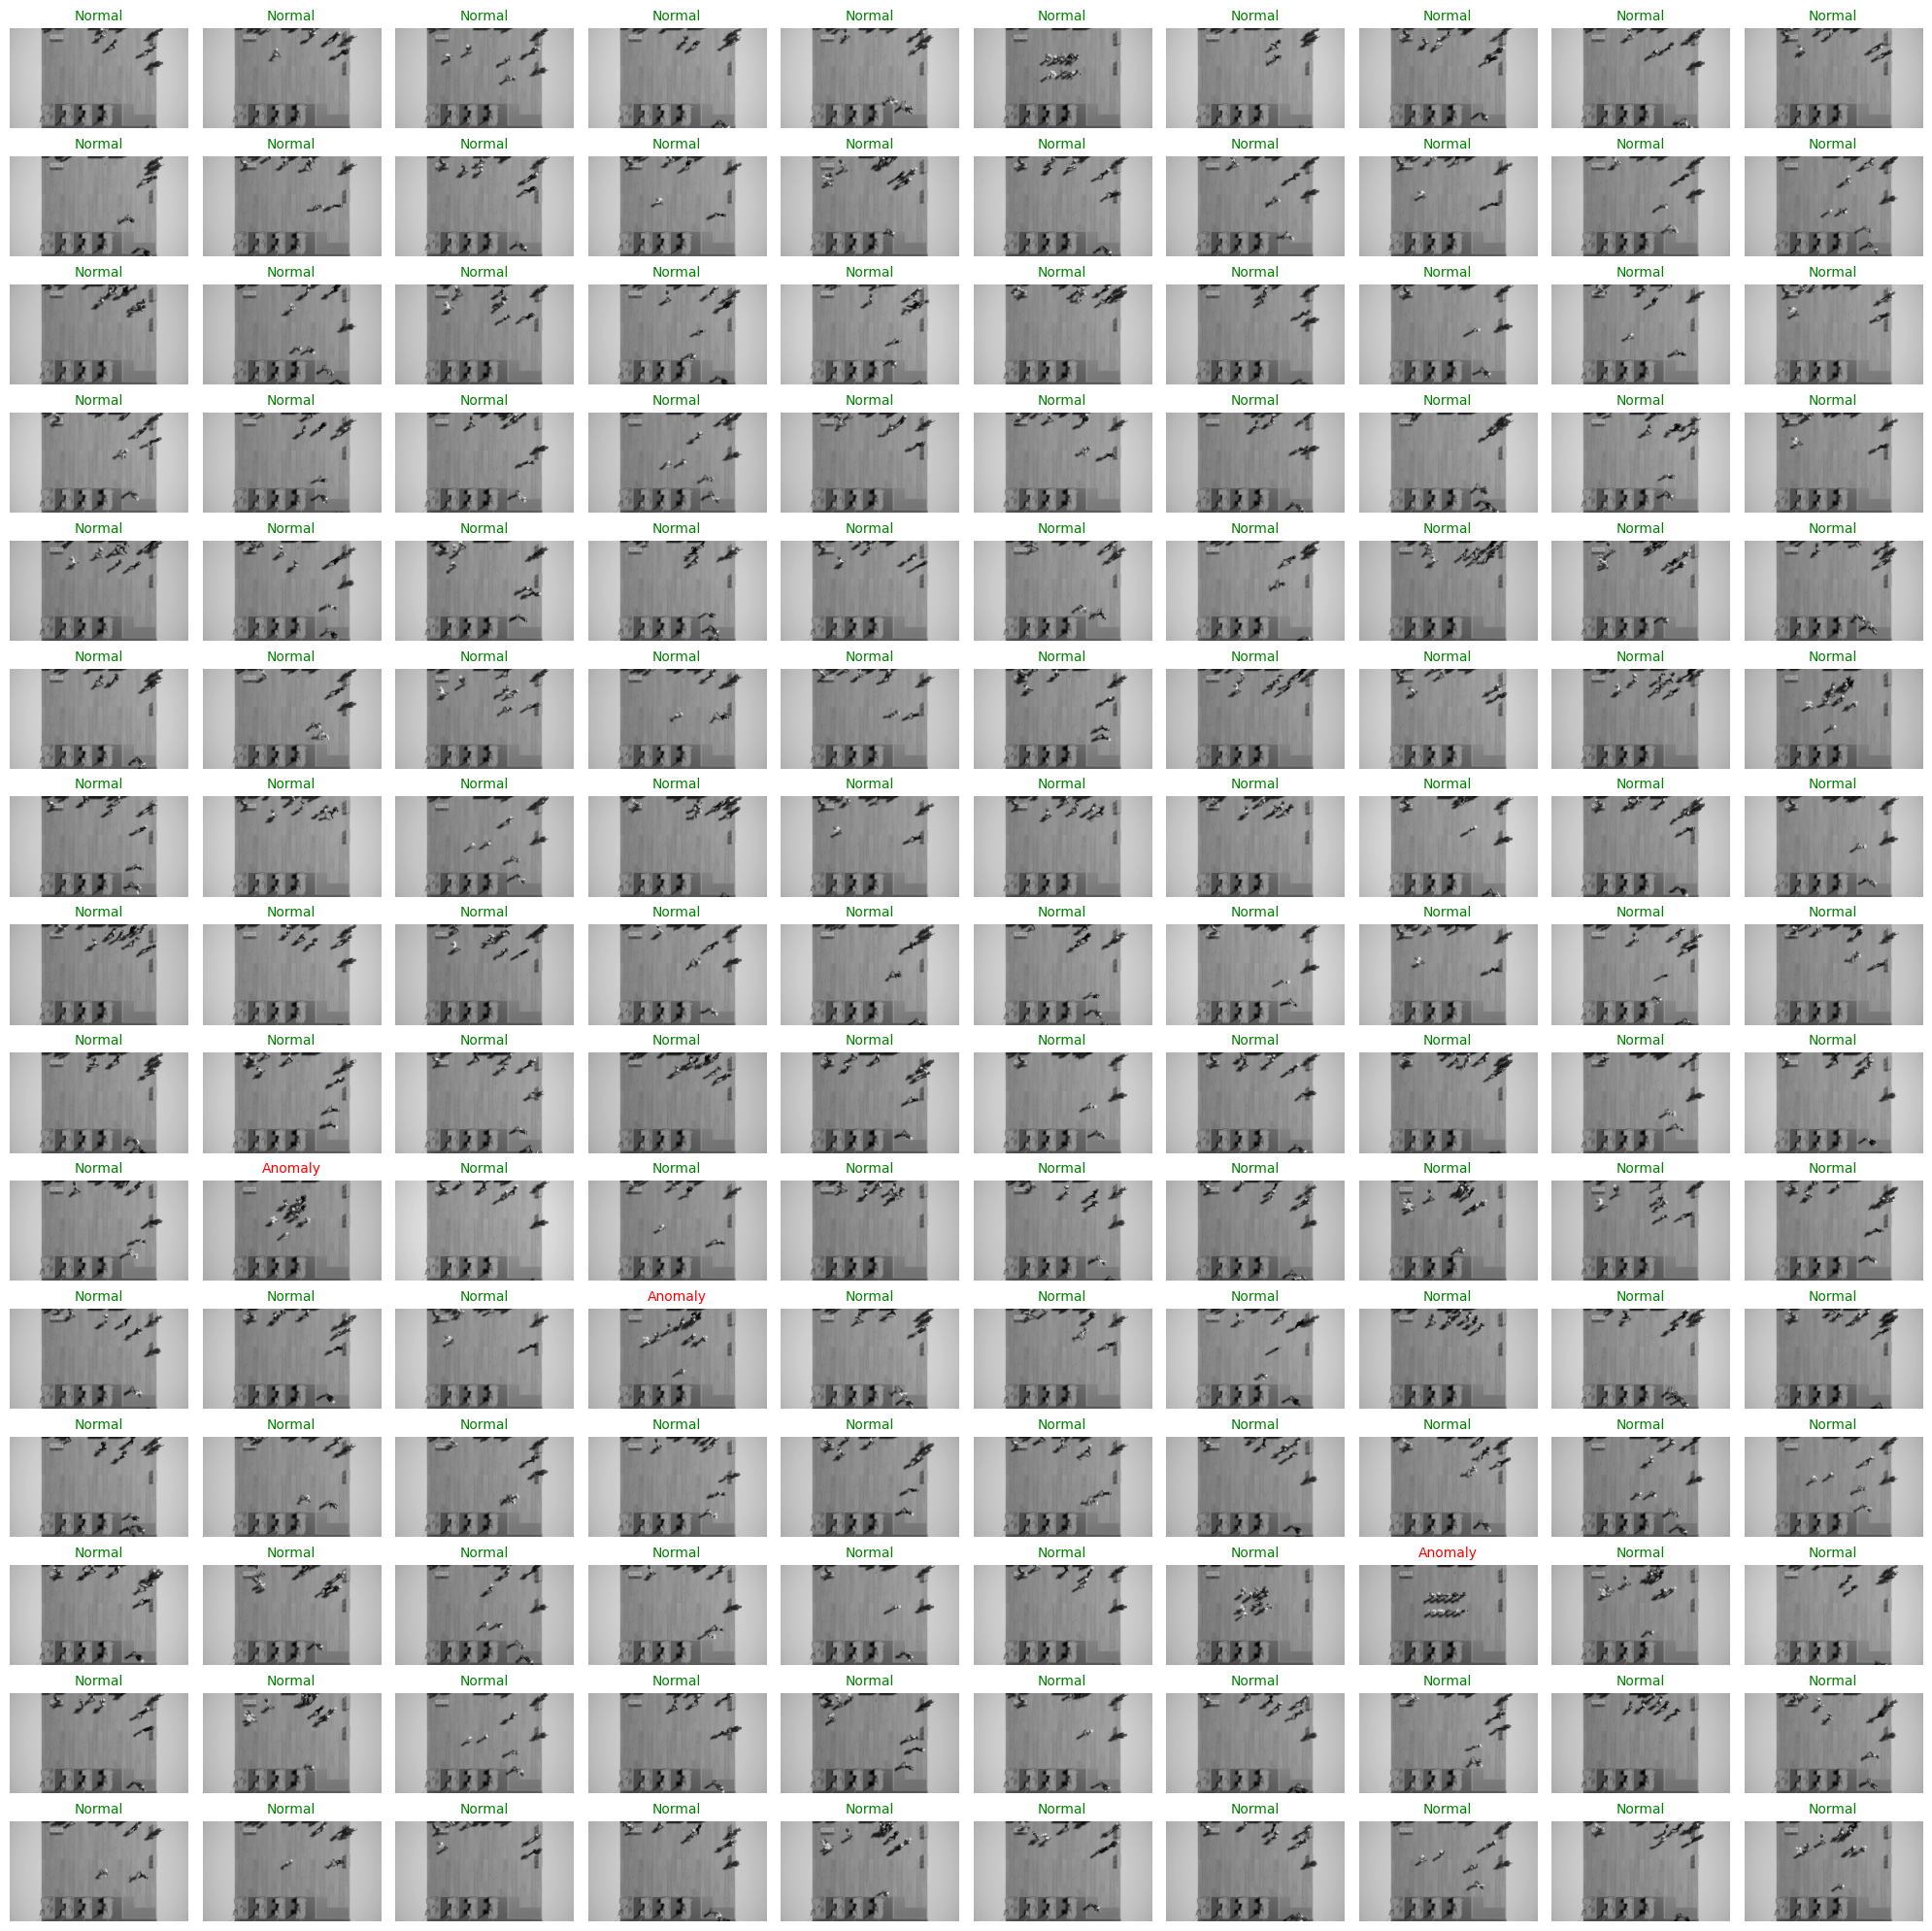

In [33]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Set dataset path
dataset_path = "/content/extracted_dataset"  # Update this if needed

# Find all image files
image_files = glob.glob(os.path.join(dataset_path, "**", "*.png"), recursive=True)
print(f"Found {len(image_files)} images.")

# Preprocess and load image data
image_data = []
valid_image_paths = []

for image_path in image_files[:5000]:  # Limit for memory efficiency
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img_resized = cv2.resize(img, (224, 224))
    img_flattened = img_resized.flatten() / 255.0
    image_data.append(img_flattened)
    valid_image_paths.append(image_path)  # Track only successfully processed images

# Convert to NumPy array
features_array = np.vstack(image_data)

# Train Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(features_array)

# Predict anomalies
predictions = clf.predict(features_array)

# Visualize predictions (first 100)
num_images = min(150, len(valid_image_paths))
rows, cols = 15, 10  # 10x10 grid

plt.figure(figsize=(20, 20))
for i in range(num_images):
    img = cv2.imread(valid_image_paths[i], cv2.IMREAD_GRAYSCALE)
    pred = predictions[i]
    label = "Anomaly" if pred == -1 else "Normal"
    color = "red" if pred == -1 else "green"

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(label, fontsize=10, color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()
